In [1]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
#from google.colab import files

##Center and Spread and the Normal Distribution

In [2]:
#Let's create an array
values = np.array([2,3,6,8,9,2,22,33])
values

array([ 2,  3,  6,  8,  9,  2, 22, 33])

In [3]:
#mean or average
values.mean()

np.float64(10.625)

In [4]:
#Standard Deviations
np.std(values)

np.float64(10.415583276994141)

## Chebyshev's Bounds ##

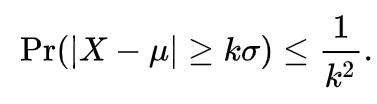

In [5]:
baby = pd.read_csv('C:/University/University Files/University-Code/Year 1/Semester 1/Python/Lessons/Data/csv/baby.csv')

In [8]:
births = baby.drop(columns=['Maternal smoker'])


In [9]:
births.hist(bins=10, figsize=(10,9), grid = False)
plot.show

NameError: name 'births' is not defined

In [ ]:
# Extract the 'Maternal Pregnancy Weight' column
mpw = births['Maternal Pregnancy Weight']

In [ ]:
# Calculate the mean and standard deviation
ave = np.mean(mpw)
sd = np.std(mpw)

ave, sd

In [ ]:
within_3_SDs = births[(mpw >= ave = 3*sd) & (mpw <= ave + 3*sd)]

In [ ]:
within_3_SDs

In [ ]:
# Proportion within 3 SDs of the mean
len(within_3_SDs)/len(births)

# within_3_SDs.shape[0]/births.shape[0]

In [ ]:
# Chebyshev's bound:
# This proportion should be at least
1 - 1/3**2

In [ ]:
births.columns

In [ ]:
# Iterate over each feature/column in the DataFrame
for feature in births.columns:
    values = births[feature]

    # Check if the column is numeric, since mean and std only apply to numeric data
    if np.issubdtype(values.dtype, np.number):
        mean = np.mean(values)
        sd = np.std(values)

        print(f"\n{feature}")

        # Check proportions for z = 2, 3, 4, 5 standard deviations
        for z in [2, 3, 4, 5]:
            # Filter the DataFrame where values fall within z standard deviations from the mean
            chosen = births[(values >= mean - z * sd) & (values <= mean + z * sd)]

            # Calculate the proportion of rows within the z standard deviations
            proportion = len(chosen) / len(births)
            percent = round(proportion * 100, 2)

            print(f'Average plus or minus {z} SDs: {percent}%')



## Standard Units ##

In [ ]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [11]:
age = births['Maternal Age'].to_numpy()
np.mean(age), np.std(age)

In [ ]:
ages_standard_units = standard_units(age)
ages_standard_units

In [ ]:
np.mean(ages_standard_units), np.std(ages_standard_units)

### Why is this useful?

We can treat large variety of different scenarios in the same way

## The SD and Bell Shaped Curves

In [ ]:
#upload the file baby.csv
#uploaded = files.upload()

In [12]:
births = pd.read_csv('C:/University/University Files/University-Code/Year 1/Semester 1/Python/Lessons/Data/csv/baby.csv')

array([[<Axes: title={'center': 'Maternal Height'}>]], dtype=object)

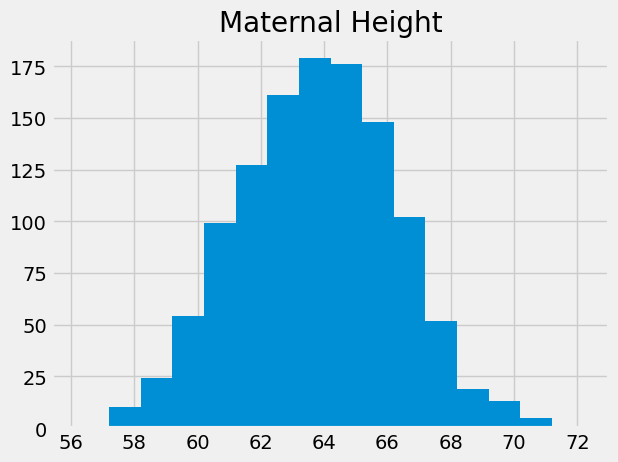

In [13]:
births.hist('Maternal Height', bins = np.arange(56.2, 72.6, 1))

In [14]:
heights = births['Maternal Height']
np.mean(heights), np.std(heights)

(np.float64(64.04940374787053), np.float64(2.5250254409674375))

In [ ]:
np.mean(heights) - np.std(heights), np.mean(heights) + np.std(heights)

## Central Limit Theorem 

The **Central Limit Theorem (CLT)** is a fundamental concept in statistics that describes the behavior of sample means as the sample size grows, regardless of the population's distribution.

### Key Idea:
- **When you take sufficiently large random samples from any population**, the **distribution of the sample means** will tend to follow a **normal distribution** (a bell-shaped curve), even if the original population distribution is not normal.
  
### More Specifically:
1. **Sample Mean Distribution**: The distribution of the sample means will approach a **normal distribution** as the sample size increases.
   
2. **Mean of the Sample Means**: The mean of the sample means will be equal to the population mean (\( \mu \)).

3. **Standard Deviation of the Sample Means**: The standard deviation of the sample means (also called the **standard error**) will be equal to the population standard deviation (\( \sigma \)) 
   divided by the square root of the sample size (\( n \)):
   
  $$\text{Standard Error} = \frac{\sigma}{\sqrt{n}}$$


### Why is the CLT Important?
- The CLT allows statisticians to **make inferences** about population parameters using sample data, even when the population distribution is unknown.
- It forms the foundation for many statistical tests, such as **confidence intervals** and **hypothesis testing**.

### Example:
- Suppose you take samples of people's heights from a population. Even if the population of heights is not normally distributed, if you repeatedly take large enough samples (say, 30 or more), the **distribution of the average heights of these samples** will tend to form a normal distribution.


In [ ]:
#upload the file united.csv
#uploaded = files.upload()

In [16]:
united = pd.read_csv('C:/University/University Files/University-Code/Year 1/Semester 1/Python/Lessons/Data/csv/united.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


array([[<Axes: title={'center': 'Delay'}>]], dtype=object)

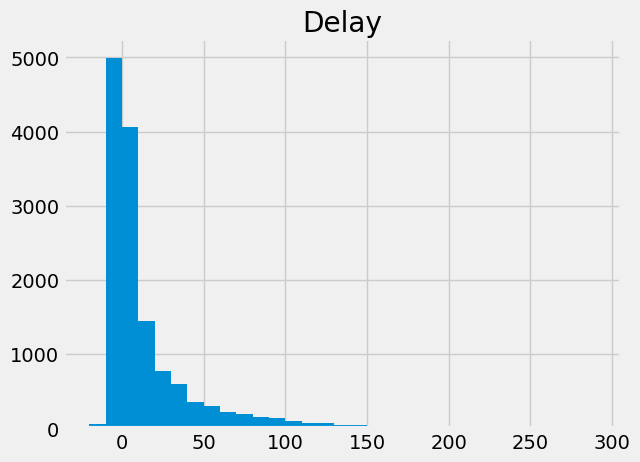

In [17]:
united_bins = np.arange(-20, 300,10)
united.hist('Delay', bins=united_bins)

In [18]:
delays = united['Delay']
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(np.float64(16.658155515370705), np.float64(39.480199851609314))

In [19]:
# Calculate the median
percentile_50 = delays.quantile(0.5)

In [20]:
percentile_50

np.float64(2.0)

In [21]:
def one_sample_mean(sample_size):
    """
    Takes a sample from the population of flights
    and computes its mean
    """
    # Sample 'sample_size' rows from the united DataFrame
    sampled_flights = united.sample(n=sample_size)

    # Compute and return the mean of the 'Delay' column from the sampled rows
    return sampled_flights['Delay'].mean()


In [26]:
one_sample_mean(100)

np.float64(17.8)

In [27]:
def ten_thousand_sample_means(sample_size):
    means = []  # Start with an empty list to store the sample means
    for i in range(10000):  # Loop 10,000 times
        mean = one_sample_mean(sample_size)  # Compute the mean for each sample
        means.append(mean)  # Append the mean to the list
    return np.array(means)  # Convert the list of means to a numpy array


In [28]:
sample_mean_100 = ten_thousand_sample_means(100)

In [29]:
sample_mean_100

array([20.58, 16.11, 14.88, ..., 12.59, 25.03, 22.05])

In [30]:
len(sample_mean_100)

10000

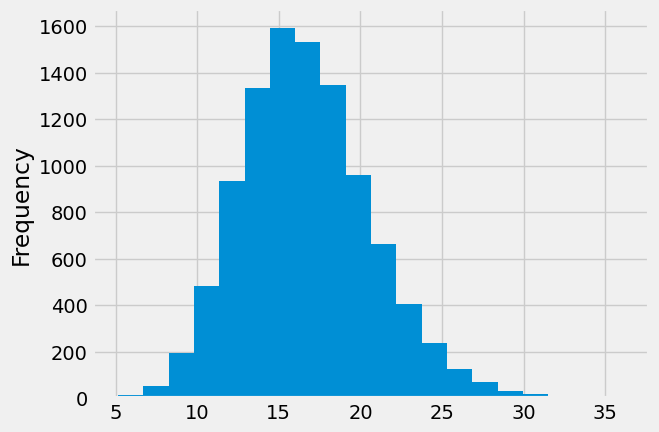

Population Average 16.658155515370705


In [33]:
# Create a DataFrame with the sample means
df = pd.DataFrame({'Mean of 100 flight delays': sample_mean_100})
# Plot a histogram of the sample means with 20 bins
df['Mean of 100 flight delays'].plot(kind='hist', bins=20)
# Display the plot
plots.show()
print('Population Average', delay_mean)


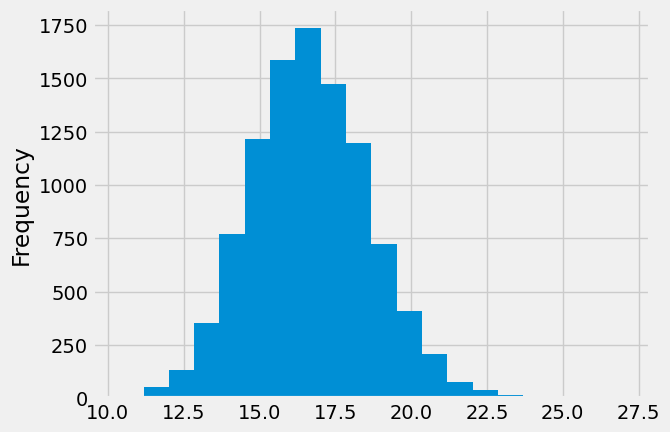

Population Average 16.658155515370705


In [34]:
# Generate sample means for sample size of 400
sample_mean_400 = ten_thousand_sample_means(400)
# Create a DataFrame with the sample means
df_400 = pd.DataFrame({'Mean of 400 flight delays': sample_mean_400})
# Plot a histogram of the sample means with 20 bins
df_400['Mean of 400 flight delays'].plot(kind='hist', bins=20)
# Display the plot
plots.show()
# Print the population average
print("Population Average", delay_mean)


## CLT: Spread

Central Limit Theorem (CLT), "spread" refers to how much the data points in the distribution of the sample means vary from the mean. This is quantified by the standard deviation of the sample means, which is known as the standard error.


Spread of Individual Data Points (Population Standard Deviation):
The standard deviation of the population (
𝜎
σ) measures the spread of individual data points in the entire population. It tells you how much the data points deviate from the population mean.

In [35]:
sample_mean_900 = ten_thousand_sample_means(900)

In [36]:
# Create a DataFrame with columns for the sample means of size 400 and 900
means_table = pd.DataFrame({
    '400': sample_mean_400,
    '900': sample_mean_900
})
# Display the DataFrame
means_table

,400,900
0,15.8900,16.633333
1,20.5500,16.068889
2,16.9975,16.910000
3,14.7625,13.593333
4,16.1300,14.430000
...,...,...
9995,17.8000,15.972222
9996,19.9975,13.851111
9997,17.8250,15.142222
9998,19.7325,16.373333


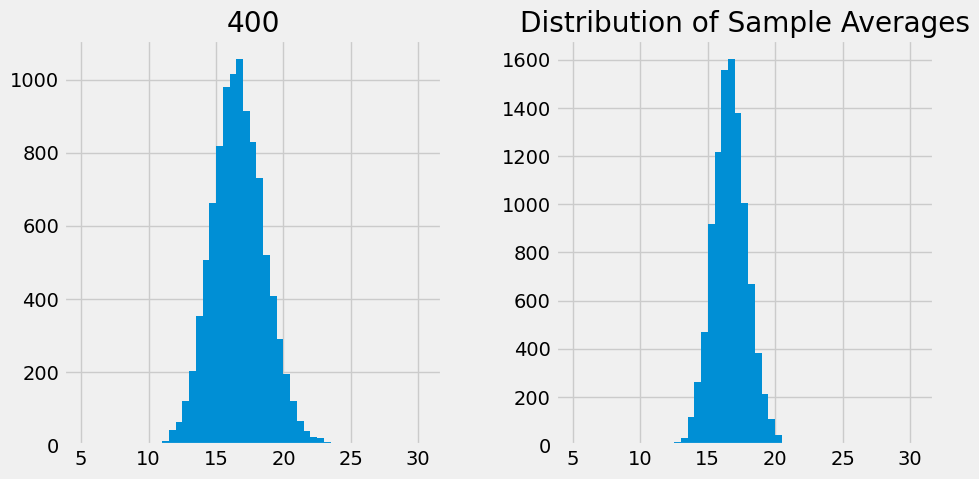

In [37]:
# Plot histograms for the '400' and '900' columns with the specified bins
means_table.hist(bins=np.arange(5, 31, 0.5), figsize=(10,5))
# Set the title for the plot
plots.title('Distribution of Sample Averages')
# Display the plot
plots.show()


## Quantifying the Effect of Sample Size

This is an important concept in statistics, especially when using the Central Limit Theorem (CLT). 
As the sample size increases, it affects various properties of the sample means distribution, such as the spread (variance or standard deviation), accuracy, and the shape of the distribution.

In [38]:

def plot_and_summarize_sample_means(sample_size):
    # Generate the sample means
    sample_means = ten_thousand_sample_means(sample_size)

    # Create a DataFrame for the sample means
    sample_means_df = pd.DataFrame({'Sample Means': sample_means})

    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("\nPopulation SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))
    print("Ratio:", delay_sd / np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_df['Sample Means'].plot(kind='hist', bins=20, figsize=(8, 5))

    # Add labels and title
    plots.xlabel('Sample Means')
    plots.title(f'Sample Size {sample_size}')

    # Display the plot
    plots.show()


Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.623944

Population SD: 39.480199851609314
SD of sample means: 3.9414066809787593
Ratio: 10.016779045446103


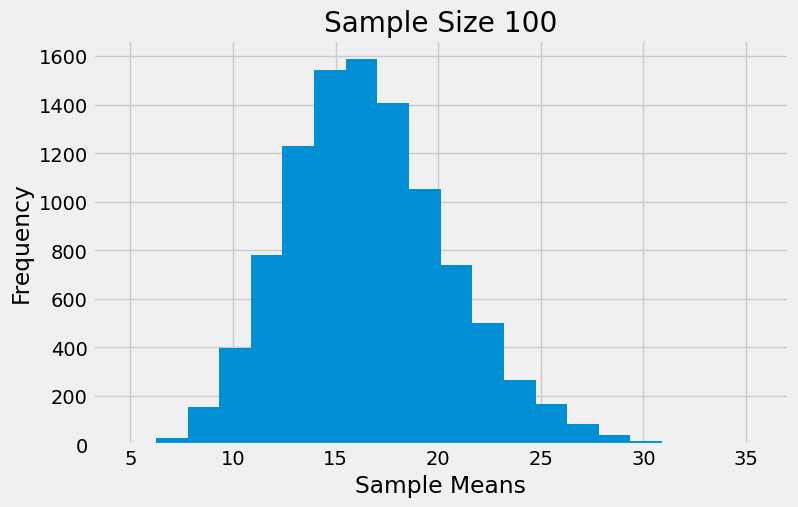

In [39]:
plot_and_summarize_sample_means(100)

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.664024

Population SD: 39.480199851609314
SD of sample means: 1.9398665804441293
Ratio: 20.352018148882376


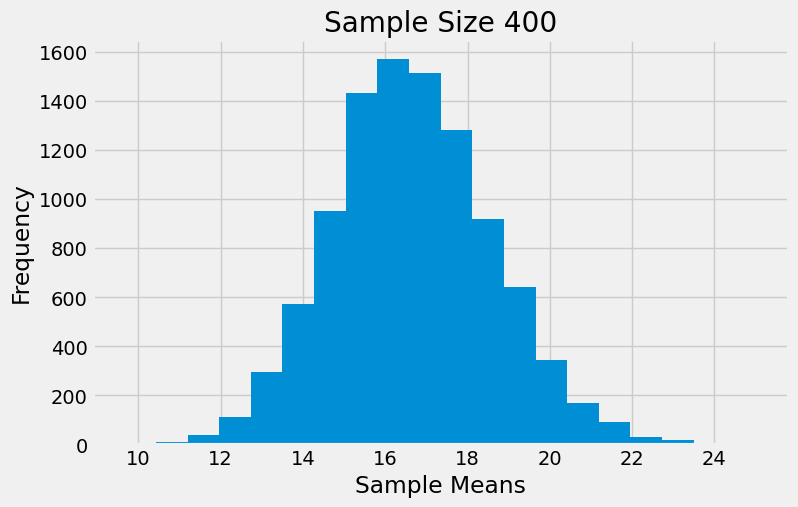

In [41]:
# what happen if i run it for 400?
plot_and_summarize_sample_means(400)

Sample size:  1000
Population mean: 16.658155515370705
Average of sample means:  16.6527749

Population SD: 39.480199851609314
SD of sample means: 1.1903179524101912
Ratio: 33.16777653539429


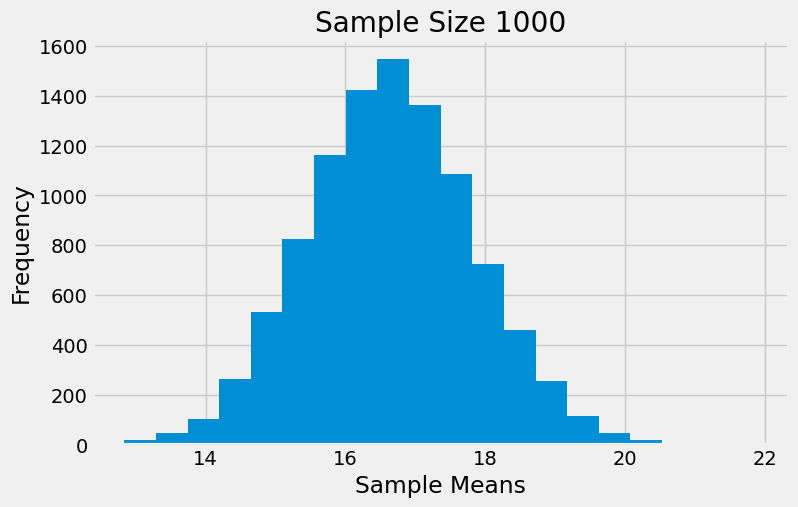

In [43]:
# 1000 times?
plot_and_summarize_sample_means(1000)